In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df_t=pd.read_csv("E:/machine learning course data/P14-Part2-Regression/Section 6 - Simple Linear Regression/Python/train.csv")
df_s=pd.read_csv("E:/machine learning course data/P14-Part2-Regression/Section 6 - Simple Linear Regression/Python/test.csv")

In [23]:
df_t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df_t.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
cols=["Cabin","Embarked"] # categorical columns
for col in cols:
  df_t[col] = df_t[col].fillna(df_t[col].mode()[0])
  df_s[col] = df_s[col].fillna(df_s[col].mode()[0])

In [27]:
print(df_t.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


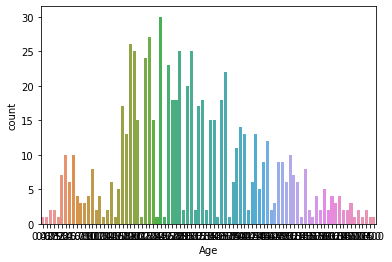

In [29]:
cols1=["Age"]
# to check see the frequencies and decide whether to use mode or not
for col1 in cols1:
    sns.countplot( x=col1 , data=df_t)
    plt.show()

In [30]:
for col2 in cols1[1:4] :
    df_t[col2] = df_t[col2].fillna(df_t[col2].mode()[0])
    df_s[col2] = df_s[col2].fillna(df_s[col2].mode()[0])

<AxesSubplot: xlabel='Age'>

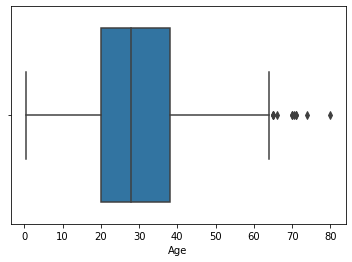

In [32]:
sns.boxplot(x="Age", data=df_t)

In [34]:
Q1 = df_t['Age'].quantile(0.25)
Q3 = df_t['Age'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outliers = []
for x in df_t['Age']:
    if ((x > up_lim) or (x < low_lim)):
         outliers.append(x)
percent=len(outliers)/len(df_t['Age'])*100
print(f"the percentage of outliers = {percent:4.2f} %") 

the percentage of outliers = 1.23 %


In [35]:
df_t['Age']=df_t['Age'].fillna(df_t['Age'].mean())
df_s['Age']=df_s['Age'].fillna(df_s['Age'].mean())


In [37]:
print(df_t.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ["Name","Sex","Ticket","Fare","Cabin","Embarked"]
le = LabelEncoder()
for col in cols:
    df_t[col] = le.fit_transform(df_t[col])
for col in cols[:5]:    
    df_s[col] = le.fit_transform(df_s[col])

df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,18,47,2
1,2,1,1,190,0,38.0,1,0,596,207,81,0
2,3,1,3,353,0,26.0,0,0,669,41,47,2
3,4,1,1,272,0,35.0,1,0,49,189,55,2
4,5,0,3,15,1,35.0,0,0,472,43,47,2


In [39]:
x= df_t[["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]]
y = df_t[["Survived"]]

In [40]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

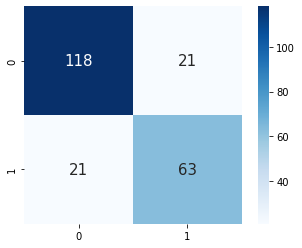

In [53]:
from sklearn.svm import SVC # support Vector machine Classification algorithm.
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) # predict the values using the classifier model that we made
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # plot a confusion matrix to evaluate our models classifications accuracy.
sns.heatmap(cm , square=True, fmt='1.0f',  annot=True,  annot_kws={'size':15} , cmap='Blues')
plt.show()


In [45]:
acc = (metrics.accuracy_score(y_test,y_pred))*100
print(f"Accuracy is {acc:4.2f} %")

Accuracy is 81.17 %


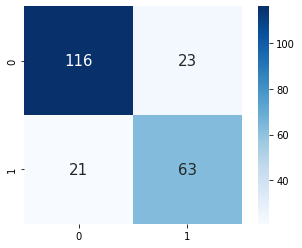

In [47]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # plot a confusion matrix to evaluate our models classifications accuracy.
sns.heatmap(cm , square=True, fmt='1.0f',  annot=True,  annot_kws={'size':15} , cmap='Blues')
plt.show()

In [48]:
acc = (metrics.accuracy_score(y_test,y_pred))*100
print(f"Accuracy is {acc:4.2f} %")

Accuracy is 80.27 %


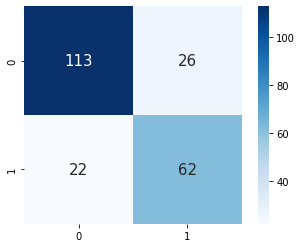

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # plot a confusion matrix to evaluate our models classifications accuracy.
sns.heatmap(cm , square=True, fmt='1.0f',  annot=True,  annot_kws={'size':15} , cmap='Blues')
plt.show()

In [50]:
acc = (metrics.accuracy_score(y_test,y_pred))*100
print(f"Accuracy is {acc:4.2f} %")

Accuracy is 78.48 %


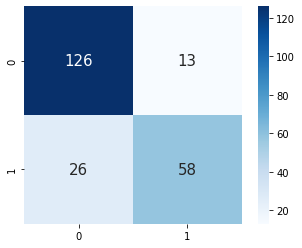

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # plot a confusion matrix to evaluate our models classifications accuracy.
sns.heatmap(cm , square=True, fmt='1.0f',  annot=True,  annot_kws={'size':15} , cmap='Blues')
plt.show()

In [52]:
acc = (metrics.accuracy_score(y_test,y_pred))*100
print(f"Accuracy is {acc:4.2f} %")

Accuracy is 82.51 %
